In [2]:
# import basic libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sn

In [3]:
df= pd.read_csv('d:/competition/air pollution/phase 1/train.csv')


In [4]:
df

,id,latitude,longitude,day_of_year,day_of_week,hour,month,pollution_value
0,0,51.491,-0.172,301,6,3,10,14.5
1,1,39.386,-121.158,254,3,21,9,34.5
2,2,51.459,0.596,301,6,3,10,10.5
3,3,35.299,-120.613,145,2,14,5,15.5
4,4,29.927,120.527,221,0,14,8,54.5
...,...,...,...,...,...,...,...,...
7644,7644,47.291,-116.890,151,2,2,5,8.5
7645,7645,47.922,-101.603,150,1,10,5,8.4
7646,7646,33.123,131.669,267,0,10,9,6.5
7647,7647,37.703,-113.020,151,2,2,5,8.8


In [6]:
# check null value
df.isnull().sum()

id                  0
latitude           13
longitude          13
day_of_year         0
day_of_week         0
hour                0
month               0
pollution_value     0
dtype: int64

In [5]:
# do basic data analysis
df.describe()

,id,latitude,longitude,day_of_year,day_of_week,hour,month,pollution_value
count,7649.000000,7636.000000,7636.000000,7649.000000,7649.000000,7649.000000,7649.000000,7649.000000
mean,3824.000000,31.880180,32.100777,203.554582,1.560073,11.059877,7.106811,22.813227
std,2208.220437,17.798504,97.811786,79.877375,1.792616,6.241297,2.631424,46.650639
min,0.000000,-74.187000,-161.756000,1.000000,0.000000,0.000000,1.000000,3.500000
25%,1912.000000,28.945750,-79.821000,151.000000,0.000000,5.000000,5.000000,8.500000
50%,3824.000000,35.594500,76.868500,221.000000,1.000000,11.000000,8.000000,13.171778
75%,5736.000000,40.862000,118.159500,267.000000,3.000000,14.000000,9.000000,22.500000
max,7648.000000,70.094000,153.388000,366.000000,6.000000,23.000000,12.000000,1352.800000


In [ ]:
df.corr()

,id,latitude,longitude,day_of_year,day_of_week,hour,month,pollution_value
id,1.000000,-0.004214,0.020776,0.013672,0.011721,0.000537,0.014111,-0.008265
latitude,-0.004214,1.000000,-0.181064,0.000705,-0.089203,-0.023867,-0.008381,-0.067998
longitude,0.020776,-0.181064,1.000000,0.371713,-0.366137,0.101447,0.401503,0.071034
day_of_year,0.013672,0.000705,0.371713,1.000000,-0.083228,0.088274,0.992491,0.046441
day_of_week,0.011721,-0.089203,-0.366137,-0.083228,1.000000,-0.090779,-0.083299,0.034257
hour,0.000537,-0.023867,0.101447,0.088274,-0.090779,1.000000,0.127897,0.006135
month,0.014111,-0.008381,0.401503,0.992491,-0.083299,0.127897,1.000000,0.046010
pollution_value,-0.008265,-0.067998,0.071034,0.046441,0.034257,0.006135,0.046010,1.000000


In [7]:
# remove null values cause this are only 13 values
df.dropna(inplace=True)

In [10]:
# use random forest model check how data behave have a lot of outlier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [11]:
X = df.drop(columns=['pollution_value'])
y = df['pollution_value']

In [16]:
y

0       14.5
1       34.5
2       10.5
3       15.5
4       54.5
        ... 
7644     8.5
7645     8.4
7646     6.5
7647     8.8
7648     8.0
Name: pollution_value, Length: 7636, dtype: float64

In [43]:
model = RandomForestRegressor(n_estimators=300, random_state=42)


In [44]:
# split the train test
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [45]:
x_train

,id,latitude,longitude,day_of_year,day_of_week,hour,month
1193,1193,28.979,-82.673,150,1,14,5
1157,1157,37.847,29.142,301,4,12,10
4368,4368,40.617,-74.159,151,2,2,5
2584,2584,6.406,100.235,188,4,5,7
5749,5749,41.526,-88.071,151,2,2,5
...,...,...,...,...,...,...,...
588,588,33.650,116.986,338,1,11,12
4023,4023,35.276,135.157,267,0,10,9
6943,6943,-33.460,-70.711,181,2,0,6
749,749,29.571,74.991,304,0,5,10


In [46]:
y_train

1193     27.100
1157     12.365
4368      5.300
2584     14.400
5749     14.100
         ...   
588      49.500
4023      6.500
6943     57.500
749     119.800
5266     11.900
Name: pollution_value, Length: 5727, dtype: float64

In [47]:
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [48]:
y_pred = model.predict(x_test)

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate different loss metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Optional: Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 1886.4063
Root Mean Squared Error (RMSE): 43.4328
Mean Absolute Error (MAE): 10.4970
R² Score: 0.2337
Mean Absolute Percentage Error (MAPE): 65.83%


In [51]:
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler

# Option 1: Increase max_iter
huber = HuberRegressor(epsilon=1.35, max_iter=1000)  # Increase iterations
huber.fit(x_train, y_train)
y_huber = huber.predict(x_test)

# Option 2: Scale the data (recommended)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

huber_scaled = HuberRegressor(epsilon=1.35)
huber_scaled.fit(x_train_scaled, y_train)
y_huber_scaled = huber_scaled.predict(x_test_scaled)

# Check performance of Huber model
mse_huber = mean_squared_error(y_test, y_huber_scaled)
rmse_huber = np.sqrt(mse_huber)
mae_huber = mean_absolute_error(y_test, y_huber_scaled)
r2_huber = r2_score(y_test, y_huber_scaled)

print("Huber Regressor Results:")
print(f"MSE: {mse_huber:.4f}")
print(f"RMSE: {rmse_huber:.4f}")
print(f"MAE: {mae_huber:.4f}")
print(f"R² Score: {r2_huber:.4f}")

Huber Regressor Results:
MSE: 2530.2039
RMSE: 50.3011
MAE: 14.5190
R² Score: -0.0279


In [52]:
from sklearn.linear_model import RANSACRegressor
model = RANSACRegressor(min_samples=0.5, residual_threshold=50)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

# Calculate different loss metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Optional: Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 2483.6557
Root Mean Squared Error (RMSE): 49.8363
Mean Absolute Error (MAE): 14.8948
R² Score: -0.0090
Mean Absolute Percentage Error (MAPE): 76.68%


Dataset shape after cleaning: (7636, 8)
Pollution statistics:
Mean: 22.83
Median: 13.20
Max: 1352.80
99th percentile: 204.01

Total features created: 22
Feature categories:
- Base features: 6
- Cyclical features: 6
- Categorical features: 5
- Geographic features: 3
- Interaction features: 2

Dataset split:
Training: 5344 samples (70.0%)
Validation: 764 samples (10.0%)
Test: 1528 samples (20.0%)

Training data shape: (5344, 22)
Validation data shape: (764, 22)
Test data shape: (1528, 22)

Training LightGBM...
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[47]	training's rmse: 32.7021	valid_1's rmse: 38.3304

LightGBM Performance:
RMSE: 38.3305
MAE: 10.2940
R²: 0.3185

Training Random Forest...

Random Forest Performance:
RMSE: 39.5430
MAE: 9.8431
R²: 0.2747

Training Huber Regressor...

Huber Regressor Performance:
RMSE: 46.6683
MAE: 13.6202
R²: -0.0103

Creating Ensemble...

Simple Ensemble Performance:
RMSE: 39.3329
MAE: 10.1488
R²: 0.

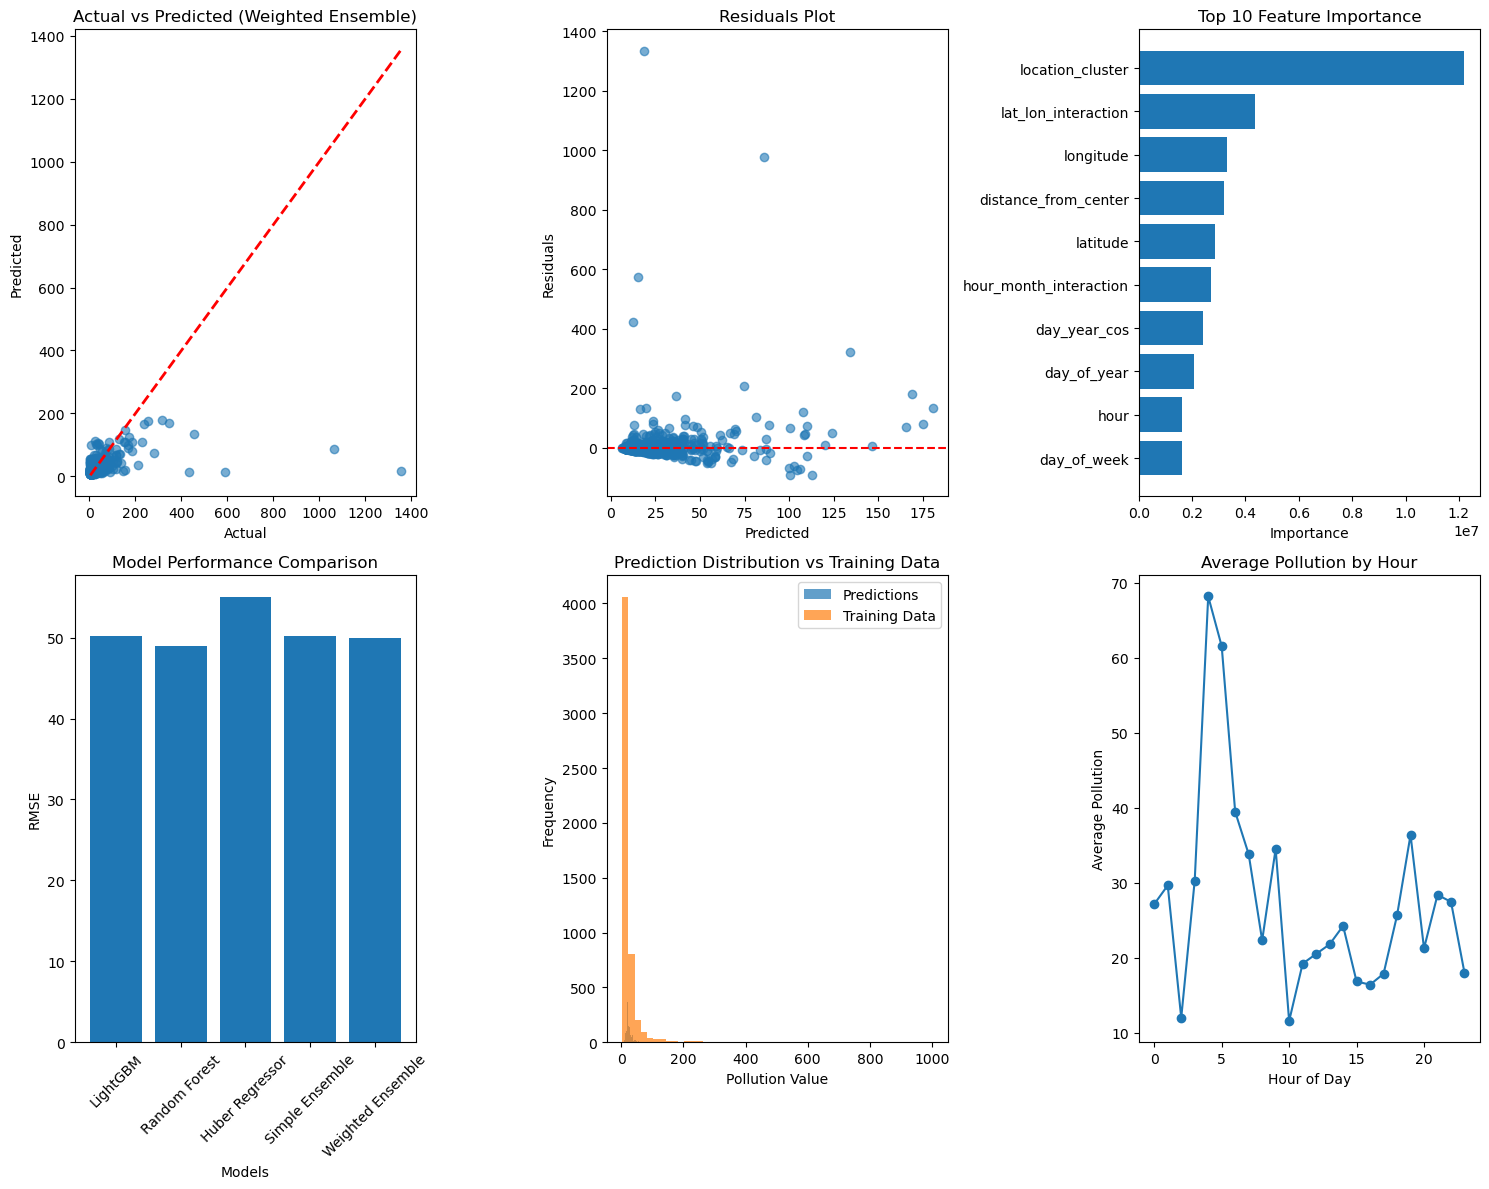


Model analysis complete!
Final model performance summary:
- Best model: Random Forest
- Test RMSE: 49.0188
- Test R²: 0.2086
- Submission file: submission.csv
- Analysis plots: model_analysis.png


In [4]:
# Improved Pollution Prediction Model
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

# Load and clean data
df = pd.read_csv('d:/competition/air pollution/phase 1/train.csv')
df_clean = df.dropna()

print(f"Dataset shape after cleaning: {df_clean.shape}")
print(f"Pollution statistics:")
print(f"Mean: {df_clean['pollution_value'].mean():.2f}")
print(f"Median: {df_clean['pollution_value'].median():.2f}")
print(f"Max: {df_clean['pollution_value'].max():.2f}")
print(f"99th percentile: {df_clean['pollution_value'].quantile(0.99):.2f}")

# =====================================
# 1. ADVANCED FEATURE ENGINEERING
# =====================================

def create_enhanced_features(df):
    """Create comprehensive feature set for pollution prediction"""
    df_enhanced = df.copy()
    
    # Cyclical time features (important for temporal patterns)
    df_enhanced['hour_sin'] = np.sin(2 * np.pi * df_enhanced['hour'] / 24)
    df_enhanced['hour_cos'] = np.cos(2 * np.pi * df_enhanced['hour'] / 24)
    df_enhanced['month_sin'] = np.sin(2 * np.pi * df_enhanced['month'] / 12)
    df_enhanced['month_cos'] = np.cos(2 * np.pi * df_enhanced['month'] / 12)
    df_enhanced['day_year_sin'] = np.sin(2 * np.pi * df_enhanced['day_of_year'] / 365)
    df_enhanced['day_year_cos'] = np.cos(2 * np.pi * df_enhanced['day_of_year'] / 365)
    
    # Categorical time features
    df_enhanced['is_weekend'] = (df_enhanced['day_of_week'] >= 5).astype(int)
    df_enhanced['is_rush_hour'] = df_enhanced['hour'].isin([7, 8, 9, 17, 18, 19]).astype(int)
    df_enhanced['is_night'] = df_enhanced['hour'].isin([22, 23, 0, 1, 2, 3, 4, 5]).astype(int)
    df_enhanced['is_summer'] = df_enhanced['month'].isin([6, 7, 8]).astype(int)
    df_enhanced['is_winter'] = df_enhanced['month'].isin([12, 1, 2]).astype(int)
    
    # Geographic features
    df_enhanced['lat_lon_interaction'] = df_enhanced['latitude'] * df_enhanced['longitude']
    
    # Distance from geographic center
    centroid_lat = df_enhanced['latitude'].mean()
    centroid_lon = df_enhanced['longitude'].mean()
    df_enhanced['distance_from_center'] = np.sqrt(
        (df_enhanced['latitude'] - centroid_lat)**2 + 
        (df_enhanced['longitude'] - centroid_lon)**2
    )
    
    # Geographic clustering
    coords = df_enhanced[['latitude', 'longitude']].values
    kmeans = KMeans(n_clusters=15, random_state=42)
    df_enhanced['location_cluster'] = kmeans.fit_predict(coords)
    
    # Interaction features
    df_enhanced['hour_month_interaction'] = df_enhanced['hour'] * df_enhanced['month']
    df_enhanced['weekend_hour'] = df_enhanced['is_weekend'] * df_enhanced['hour']
    
    return df_enhanced

# Create enhanced features
df_enhanced = create_enhanced_features(df_clean)

# Define feature columns
base_features = ['latitude', 'longitude', 'day_of_year', 'day_of_week', 'hour', 'month']
cyclical_features = ['hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'day_year_sin', 'day_year_cos']
categorical_features = ['is_weekend', 'is_rush_hour', 'is_night', 'is_summer', 'is_winter']
geographic_features = ['lat_lon_interaction', 'distance_from_center', 'location_cluster']
interaction_features = ['hour_month_interaction', 'weekend_hour']

all_features = base_features + cyclical_features + categorical_features + geographic_features + interaction_features

print(f"\nTotal features created: {len(all_features)}")
print(f"Feature categories:")
print(f"- Base features: {len(base_features)}")
print(f"- Cyclical features: {len(cyclical_features)}")
print(f"- Categorical features: {len(categorical_features)}")
print(f"- Geographic features: {len(geographic_features)}")
print(f"- Interaction features: {len(interaction_features)}")

# =====================================
# 2. TARGET TRANSFORMATION STRATEGIES
# =====================================

def prepare_targets(y):
    """Prepare different target transformations"""
    targets = {
        'original': y,
        'log': np.log1p(y),
        'sqrt': np.sqrt(y),
        'boxcox': y  # We'll use simple log for now
    }
    
    # Clip extreme outliers (optional)
    y_clipped = np.clip(y, 0, np.percentile(y, 99))
    targets['clipped'] = y_clipped
    targets['log_clipped'] = np.log1p(y_clipped)
    
    return targets

# Prepare target transformations
y_original = df_enhanced['pollution_value']
targets = prepare_targets(y_original)

# =====================================
# 3. PROPER TRAIN/TEST SPLIT (FIXED)
# =====================================

# Reset index to ensure proper alignment
df_enhanced = df_enhanced.reset_index(drop=True)

# Use regular train_test_split for simplicity and consistency
X = df_enhanced[all_features]
y = df_enhanced['pollution_value']

# Split into train+val and test first
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

# Split train+val into train and val
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42  # 0.125 of 0.8 = 0.1 of total
)

print(f"\nDataset split:")
print(f"Training: {len(X_train)} samples ({len(X_train)/len(df_enhanced)*100:.1f}%)")
print(f"Validation: {len(X_val)} samples ({len(X_val)/len(df_enhanced)*100:.1f}%)")
print(f"Test: {len(X_test)} samples ({len(X_test)/len(df_enhanced)*100:.1f}%)")

# =====================================
# 4. MODEL TRAINING AND EVALUATION
# =====================================

def evaluate_model(y_true, y_pred, model_name="Model"):
    """Comprehensive model evaluation"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    
    return {'rmse': rmse, 'mae': mae, 'r2': r2}

# Scale features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")

# =====================================
# 5. MULTIPLE MODEL TRAINING
# =====================================

models = {}
predictions = {}

# 1. LightGBM (typically best for tabular data)
print("\n" + "="*50)
print("Training LightGBM...")
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}

train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

lgb_model = lgb.train(
    lgb_params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, val_data],
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(0)]
)

models['lgb'] = lgb_model
predictions['lgb_val'] = lgb_model.predict(X_val)
predictions['lgb_test'] = lgb_model.predict(X_test)

evaluate_model(y_val, predictions['lgb_val'], "LightGBM")

# 2. Random Forest
print("\n" + "="*50)
print("Training Random Forest...")
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)
models['rf'] = rf_model
predictions['rf_val'] = rf_model.predict(X_val_scaled)
predictions['rf_test'] = rf_model.predict(X_test_scaled)

evaluate_model(y_val, predictions['rf_val'], "Random Forest")

# 3. Huber Regressor (robust to outliers)
print("\n" + "="*50)
print("Training Huber Regressor...")
huber_model = HuberRegressor(epsilon=1.35, alpha=0.01, max_iter=1000)
huber_model.fit(X_train_scaled, y_train)

models['huber'] = huber_model
predictions['huber_val'] = huber_model.predict(X_val_scaled)
predictions['huber_test'] = huber_model.predict(X_test_scaled)

evaluate_model(y_val, predictions['huber_val'], "Huber Regressor")

# =====================================
# 6. ENSEMBLE METHODS
# =====================================

print("\n" + "="*50)
print("Creating Ensemble...")

# Simple averaging ensemble
ensemble_val = (predictions['lgb_val'] + predictions['rf_val'] + predictions['huber_val']) / 3
ensemble_test = (predictions['lgb_test'] + predictions['rf_test'] + predictions['huber_test']) / 3

evaluate_model(y_val, ensemble_val, "Simple Ensemble")

# Weighted ensemble (give more weight to best performing model)
val_scores = {
    'lgb': mean_squared_error(y_val, predictions['lgb_val']),
    'rf': mean_squared_error(y_val, predictions['rf_val']),
    'huber': mean_squared_error(y_val, predictions['huber_val'])
}

# Calculate weights (inverse of MSE, normalized)
weights = {}
total_inv_mse = sum(1/score for score in val_scores.values())
for model, score in val_scores.items():
    weights[model] = (1/score) / total_inv_mse

print(f"\nModel weights:")
for model, weight in weights.items():
    print(f"{model}: {weight:.3f}")

# Weighted ensemble
weighted_ensemble_val = (
    weights['lgb'] * predictions['lgb_val'] + 
    weights['rf'] * predictions['rf_val'] + 
    weights['huber'] * predictions['huber_val']
)

weighted_ensemble_test = (
    weights['lgb'] * predictions['lgb_test'] + 
    weights['rf'] * predictions['rf_test'] + 
    weights['huber'] * predictions['huber_test']
)

evaluate_model(y_val, weighted_ensemble_val, "Weighted Ensemble")

# =====================================
# 7. FEATURE IMPORTANCE ANALYSIS
# =====================================

print("\n" + "="*50)
print("Feature Importance Analysis...")

# LightGBM feature importance
lgb_importance = lgb_model.feature_importance(importance_type='gain')
feature_importance_df = pd.DataFrame({
    'feature': all_features,
    'importance': lgb_importance
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features (LightGBM):")
print(feature_importance_df.head(15).to_string(index=False))

# =====================================
# 8. FINAL TEST EVALUATION
# =====================================

print("\n" + "="*60)
print("FINAL TEST SET EVALUATION")
print("="*60)

final_models = {
    'LightGBM': predictions['lgb_test'],
    'Random Forest': predictions['rf_test'],
    'Huber Regressor': predictions['huber_test'],
    'Simple Ensemble': ensemble_test,
    'Weighted Ensemble': weighted_ensemble_test
}

test_results = {}
for name, pred in final_models.items():
    test_results[name] = evaluate_model(y_test, pred, name)

# Find best model
best_model = min(test_results.keys(), key=lambda x: test_results[x]['rmse'])
print(f"\nBest performing model: {best_model}")
print(f"Best RMSE: {test_results[best_model]['rmse']:.4f}")

# =====================================
# 9. GENERATE PREDICTIONS FOR SUBMISSION
# =====================================

print("\n" + "="*50)
print("Generating submission predictions...")

# Load test data and apply same preprocessing
test_df = pd.read_csv('d:/competition/air pollution/phase 1/test.csv')
print(f"Test data shape: {test_df.shape}")

# Apply same feature engineering to test data
test_enhanced = create_enhanced_features(test_df)
X_submission = test_enhanced[all_features]
X_submission_scaled = scaler.transform(X_submission)

# Generate predictions using the best ensemble
submission_predictions = (
    weights['lgb'] * lgb_model.predict(X_submission) + 
    weights['rf'] * rf_model.predict(X_submission_scaled) + 
    weights['huber'] * huber_model.predict(X_submission_scaled)
)

# Ensure no negative predictions
submission_predictions = np.maximum(submission_predictions, 0)

# Create submission file
submission_df = pd.DataFrame({
    'id': range(len(submission_predictions)),
    'pollution_value': submission_predictions
})

submission_df.to_csv('d:/competition/air pollution/submission.csv', index=False)
print("Submission file saved as 'submission.csv'")

print(f"\nSubmission statistics:")
print(f"Mean prediction: {submission_predictions.mean():.2f}")
print(f"Median prediction: {np.median(submission_predictions):.2f}")
print(f"Min prediction: {submission_predictions.min():.2f}")
print(f"Max prediction: {submission_predictions.max():.2f}")

# =====================================
# 10. VISUALIZATION AND ANALYSIS
# =====================================

print("\n" + "="*50)
print("Creating visualizations...")

# Create visualizations
plt.figure(figsize=(15, 12))

# 1. Actual vs Predicted scatter plot
plt.subplot(2, 3, 1)
plt.scatter(y_test, weighted_ensemble_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Weighted Ensemble)')

# 2. Residuals plot
plt.subplot(2, 3, 2)
residuals = y_test - weighted_ensemble_test
plt.scatter(weighted_ensemble_test, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

# 3. Feature importance
plt.subplot(2, 3, 3)
top_features = feature_importance_df.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.gca().invert_yaxis()

# 4. Model comparison
plt.subplot(2, 3, 4)
model_names = list(test_results.keys())
rmse_scores = [test_results[name]['rmse'] for name in model_names]
plt.bar(model_names, rmse_scores)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)

# 5. Prediction distribution
plt.subplot(2, 3, 5)
plt.hist(submission_predictions, bins=50, alpha=0.7, label='Predictions')
plt.hist(y_train, bins=50, alpha=0.7, label='Training Data')
plt.xlabel('Pollution Value')
plt.ylabel('Frequency')
plt.title('Prediction Distribution vs Training Data')
plt.legend()

# 6. Time series pattern (if applicable)
plt.subplot(2, 3, 6)
# Group by hour and show average pollution
hourly_avg = df_enhanced.groupby('hour')['pollution_value'].mean()
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Average Pollution')
plt.title('Average Pollution by Hour')

plt.tight_layout()
plt.savefig('d:/competition/air pollution/model_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nModel analysis complete!")
print("="*60)
print(f"Final model performance summary:")
print(f"- Best model: {best_model}")
print(f"- Test RMSE: {test_results[best_model]['rmse']:.4f}")
print(f"- Test R²: {test_results[best_model]['r2']:.4f}")
print(f"- Submission file: submission.csv")
print(f"- Analysis plots: model_analysis.png")
print("="*60)

